In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

# 1. Business understanding
Airbnb, Inc. is an American company operating an online marketplace for short- and long-term homestays and experiences (Wikipedia). As such, Airbnb want to make profit themselves but also they want hosts who provide their homes to make profit, so that more people decide for hosting on Airbnb. Therefore it is of great interest for Airbnb decision makers and developers, what factors push ratings, number and tone of reviews or price.

# 2. Data understanding

## Get a first overview

In [2]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [6]:
listings['host_response_time']

0       within a few hours
1           within an hour
2       within a few hours
3                      NaN
4           within an hour
               ...        
3813    within a few hours
3814        within an hour
3815                   NaN
3816        within an hour
3817          within a day
Name: host_response_time, Length: 3818, dtype: object

In [7]:
listings['host_acceptance_rate'].unique()

array(['100%', nan, '0%'], dtype=object)

In [8]:
listings['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [9]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Look for some details

### Do the listing id's of the homes match?

In [11]:
calendar['listing_id'].nunique()

3818

In [12]:
listings['id'].nunique()

3818

In [13]:
reviews['listing_id'].nunique()

3191

Answer: They do match in calendar and listings. They don't match in reviews. Maybe only those homes are listed that got at least one review.

### Is availability strictly connected to the existence of a price in calendar?

In [14]:
calendar[calendar['available'] == 'f']['price'].sum()

0

The answer is yes. This means the column 'available' provides no further information in comparison to column 'price'. We could therefore delete column 'available'. However i will keep it for now because it might come in handy for programmatic reasons.

### In which form do numerical variables like 'host_response_time', 'host_response_rate', 'host_acceptance_rate' in listings occur?

In [15]:
listings[['host_response_time', 'host_response_rate', 'host_acceptance_rate']]

,host_response_time,host_response_rate,host_acceptance_rate
0,within a few hours,96%,100%
1,within an hour,98%,100%
2,within a few hours,67%,100%
3,NaN,NaN,NaN
4,within an hour,100%,NaN
...,...,...,...
3813,within a few hours,99%,100%
3814,within an hour,100%,100%
3815,NaN,NaN,NaN
3816,within an hour,100%,NaN


In [16]:
listings['host_response_time'].unique()

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

In [17]:
listings['host_response_rate'].unique()

array(['96%', '98%', '67%', nan, '100%', '71%', '97%', '60%', '50%',
       '31%', '90%', '70%', '88%', '80%', '63%', '33%', '99%', '75%',
       '83%', '94%', '58%', '43%', '93%', '92%', '40%', '57%', '89%',
       '95%', '78%', '81%', '91%', '38%', '86%', '30%', '56%', '76%',
       '64%', '82%', '17%', '87%', '25%', '69%', '53%', '65%', '68%',
       '55%'], dtype=object)

In [18]:
listings['host_acceptance_rate'].unique()

array(['100%', nan, '0%'], dtype=object)

In [19]:
listings['host_acceptance_rate'].value_counts()

100%    3044
0%         1
Name: host_acceptance_rate, dtype: int64

# Three Questions related to business that arose from my data exploration:
### 1. In what way do host related features (response time, response rate, acceptance rate, has profile pic) relate to a higher price and more reviews?
### 2. How stongly do review scores and price relate?
### 3. Do homes with higher availability have higher prices?

# 3. Data Preparation

## Notes for data cleaning - Data preparation steps
**generally** rows and columns with only nan values should be deleted

**calendar** has a lot of useful quantative data
* 1. change dtype of 'date' to date_time (Question 3)
* 'available' columns is of no use for now, because it does not provide information in addition to 'price' column.
* 2. change dtype of price to float
* do **NOT** delete nan's, because it might be interesting to check if there are specific dates on which homes are typically not available

**listings** has a lot of useful quantative (e.g. scores) and qualitive data
* 3. change dtypes of f/t columns of interest to booleans ('host_is_superhost', 'host_has_profile_pic', 'host_identity_verified')
* 4. change dtypes of numerical columns of interest to int/float ('host_response_rate', 'price')
* 'host_acceptance_rate' has only two values: 100% and 0%. It's therefore not very useful, since it's the nuances that could tell us what makes a differeince.
* 'host_response_time' is categorical.
* maybe there are some nan's that can be deleted or imputed

**reviews** could be used for qualitive diagrams like wordclouds or for grasping the vibe of the respective home or neighbourhood. However this seems quite challenging for now. As my purpose is an interesting blog post, i am satisfied with a rather quantitive analysis. I will therfore put **reviews** aside. 

#### Preparing calendar df

In [20]:
# 1. Change dtype of 'date' to date_time format
calendar['date'] = pd.to_datetime(calendar['date'], format = '%Y-%m-%d')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [21]:
#2. Change dtype of price to float by a function
def num_to_float(col):
    col = col.str.replace('[$,%]', '', regex = True).astype('float64')
    return col

In [22]:
calendar['price'] = num_to_float(calendar['price'])
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


#### Preparing listings df

In [23]:
listings['host_is_superhost']

0       f
1       t
2       f
3       f
4       f
       ..
3813    f
3814    f
3815    f
3816    f
3817    f
Name: host_is_superhost, Length: 3818, dtype: object

In [24]:
# 3. Change dtypes of f/t columns of interest to booleans 
# ('host_is_superhost', 'host_has_profile_pic', 'host_identity_verified')

listings.loc[listings['host_is_superhost'] == 'f', 'host_is_superhost'] = False
listings.loc[listings['host_is_superhost'] == 't', 'host_is_superhost'] = True

listings.loc[listings['host_has_profile_pic'] == 'f', 'host_has_profile_pic'] = False
listings.loc[listings['host_has_profile_pic'] == 't', 'host_has_profile_pic'] = True

listings.loc[listings['host_identity_verified'] == 'f', 'host_identity_verified'] = False
listings.loc[listings['host_identity_verified'] == 't', 'host_identity_verified'] = True

In [25]:
listings[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']] \
    =listings[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']].astype('bool')

In [26]:
# 4. change dtype of numerical column 'host_response_rate' of interest to int/float

listings['host_response_rate'] = num_to_float(listings['host_response_rate'])/100
listings['host_response_rate']

0       0.96
1       0.98
2       0.67
3        NaN
4       1.00
        ... 
3813    0.99
3814    1.00
3815     NaN
3816    1.00
3817    1.00
Name: host_response_rate, Length: 3818, dtype: float64

In [27]:
listings['price'] = num_to_float(listings['price'])

# 4. Modeling

## Question No. 1: In what way do host related features (response time, response rate, host_is_superhost,  host_has_profile_pic, host_identity_verified) relate to a higher price or more reviews?

Text(0.5, 0.98, "Influence of Airbnb hosts' response times")

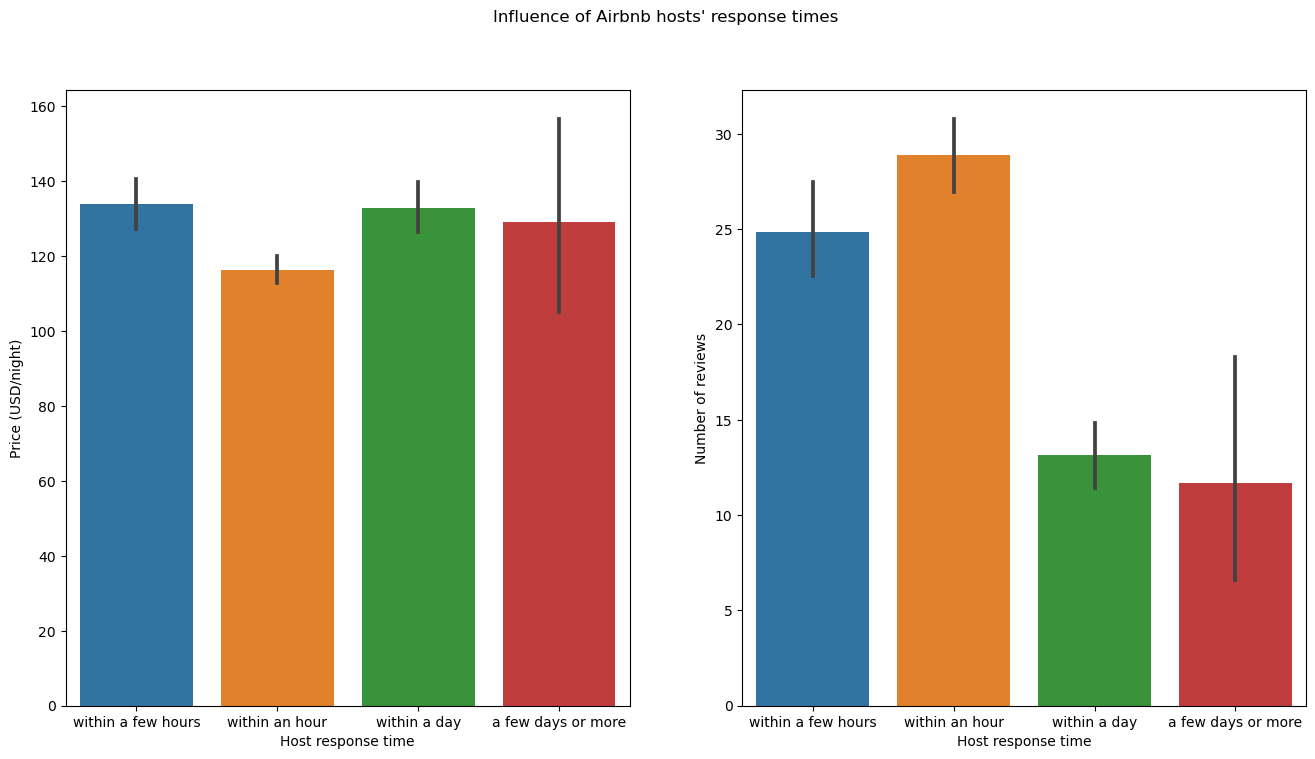

In [77]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.barplot(data = listings, x = 'host_response_time', y = 'price')
plt.xlabel('Host response time')
plt.ylabel('Price (USD/night)')

plt.subplot(1, 2, 2)
sns.barplot(data = listings, x = 'host_response_time', y = 'number_of_reviews')
plt.xlabel('Host response time')
plt.ylabel('Number of reviews');

plt.suptitle('Influence of Airbnb hosts\' response times')

Text(0, 0.5, 'Number of reviews')

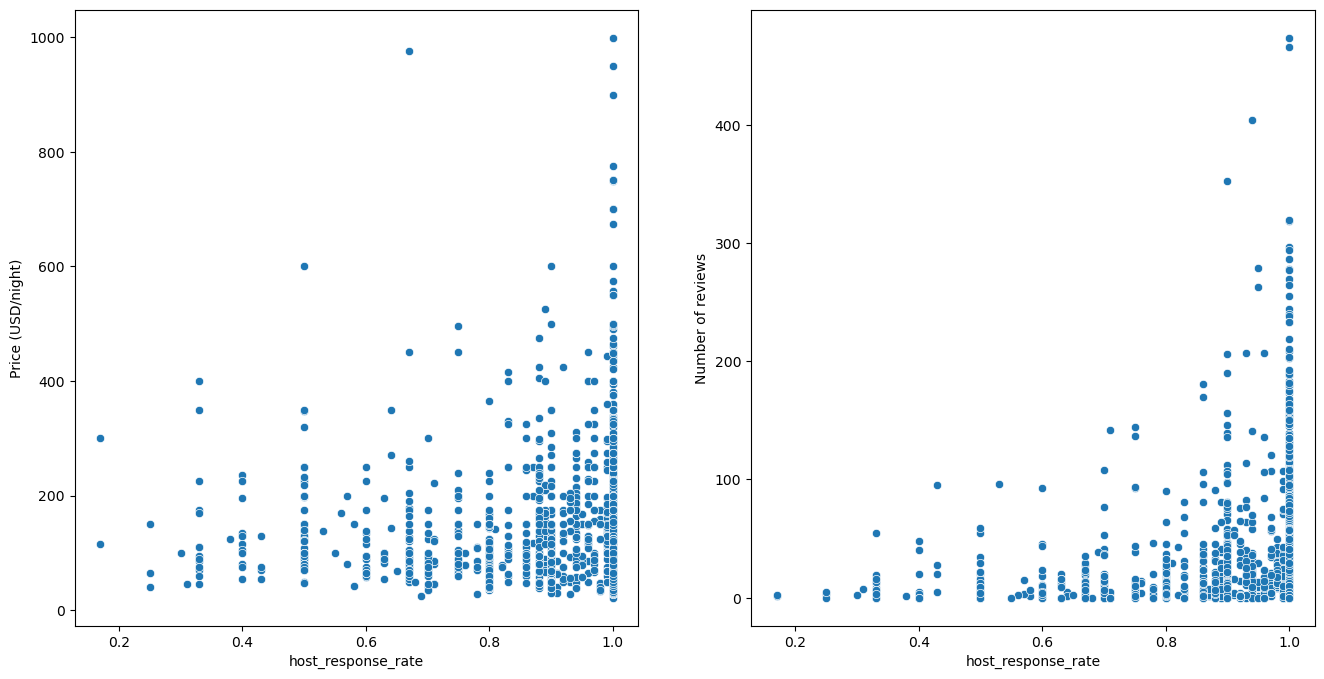

In [78]:
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
sns.scatterplot(data = listings, x = 'host_response_rate', y = 'price')

plt.ylabel('Price (USD/night)')

plt.subplot(1, 2, 2)
sns.scatterplot(data = listings, x = 'host_response_rate', y = 'number_of_reviews')

plt.ylabel('Number of reviews')

Text(0.5, 0.98, 'Some host related features in comparison to price and number of reviews')

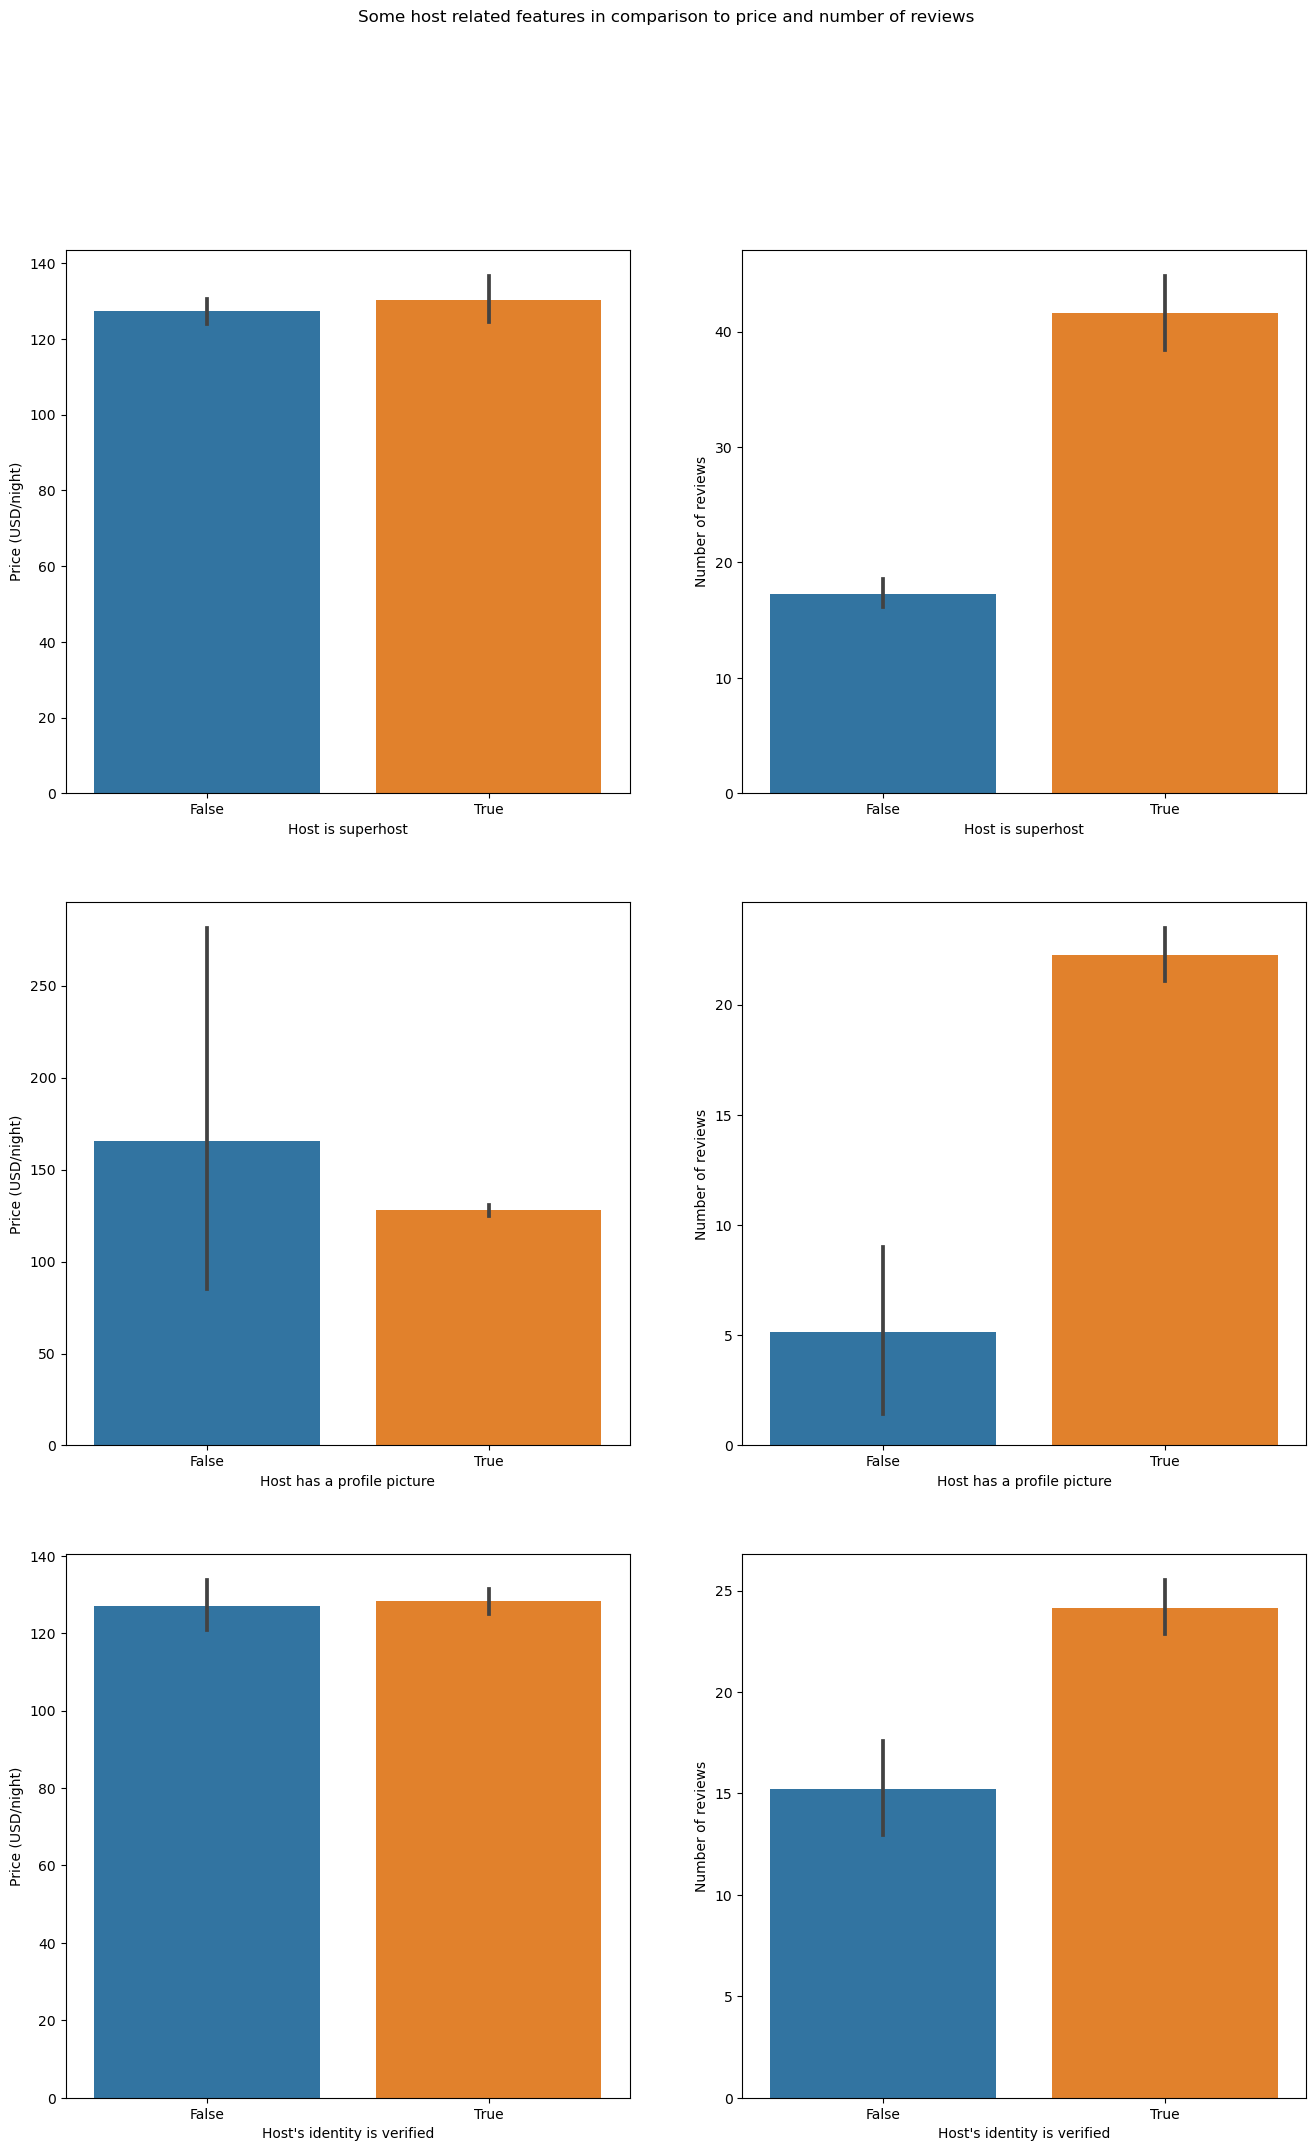

In [96]:
plt.figure(figsize=(16, 24))

plt.subplot(3, 2, 1)
sns.barplot(data = listings, x = 'host_is_superhost', y = 'price')
plt.xlabel('Host is superhost')
plt.ylabel('Price (USD/night)')

plt.subplot(3, 2, 2)
sns.barplot(data = listings, x = 'host_is_superhost', y = 'number_of_reviews')
plt.xlabel('Host is superhost')
plt.ylabel('Number of reviews')

plt.subplot(3, 2, 3)
sns.barplot(data = listings, x = 'host_has_profile_pic', y = 'price')
plt.xlabel('Host has a profile picture')
plt.ylabel('Price (USD/night)')

plt.subplot(3, 2, 4)
sns.barplot(data = listings, x = 'host_has_profile_pic', y = 'number_of_reviews')
plt.xlabel('Host has a profile picture')
plt.ylabel('Number of reviews')

plt.subplot(3, 2, 5)
sns.barplot(data = listings, x = 'host_identity_verified', y = 'price')
plt.xlabel('Host\'s identity is verified')
plt.ylabel('Price (USD/night)')

plt.subplot(3, 2, 6)
sns.barplot(data = listings, x = 'host_identity_verified', y = 'number_of_reviews')
plt.xlabel('Host\'s identity is verified')
plt.ylabel('Number of reviews')

plt.suptitle('Some host related features in comparison to price and number of reviews')

<Axes: xlabel='number_of_reviews', ylabel='price'>

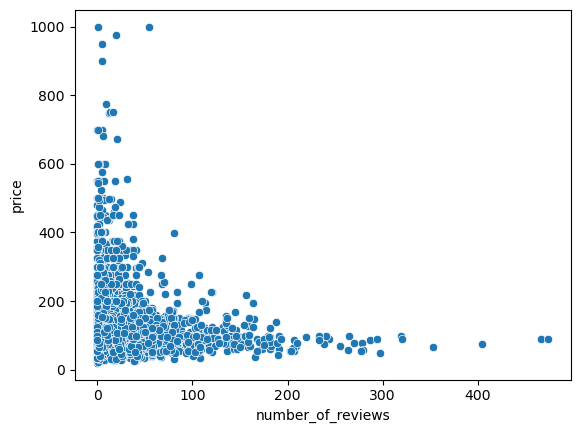

In [45]:
sns.scatterplot(data = listings, x = 'number_of_reviews', y = 'price')
plt.xlabel('Number of reviews')
plt.ylabel('')

#### Answer: Host related features have a great impact on number of reviews but no impact on price.

## Question No. 2: How stongly do review scores and prices relate?

<Axes: xlabel='review_scores_rating', ylabel='price'>

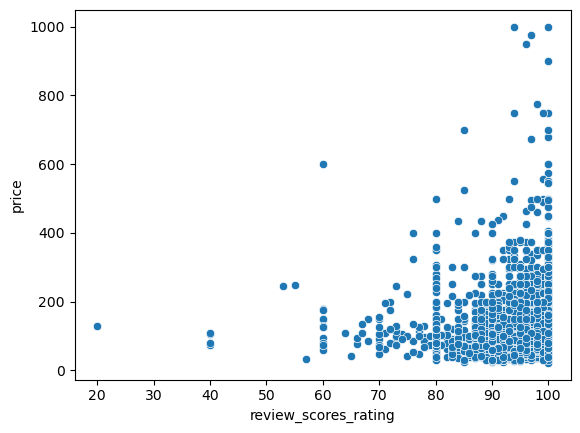

In [71]:
sns.scatterplot(data=listings, x='review_scores_rating', y='price')

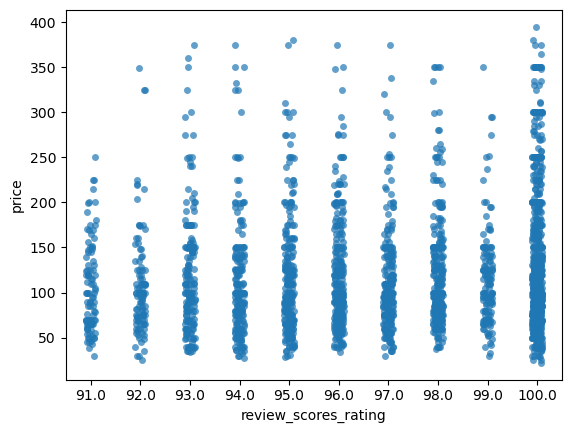

In [68]:
sns.stripplot(data = listings[(listings['review_scores_rating'] > 90) \
                              & (listings['price'] < 400)], \
              x = 'review_scores_rating', y = 'price', jitter = True, alpha=0.7);


#### Answer: They do probably not correlate significantly.

## Question No. 3: Do homes with higher availability have higher prices?

In [80]:
listings['calculated_host_listings_count'].describe()

count    3818.000000
mean        2.946307
std         5.893029
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        37.000000
Name: calculated_host_listings_count, dtype: float64

Text(0.5, 1.0, 'Availability to price')

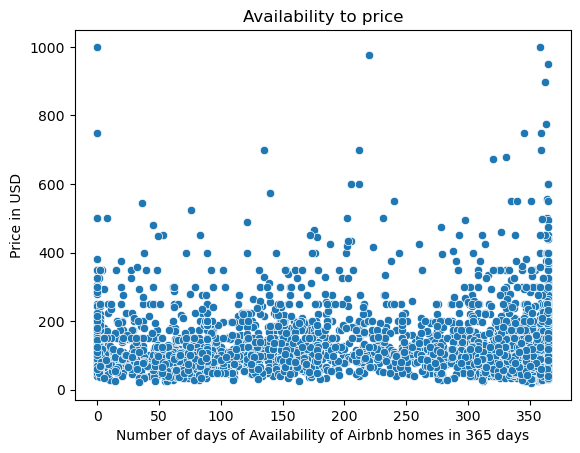

In [102]:
sns.scatterplot(data = listings, x = 'availability_365', y = 'price');
plt.xlabel('Number of days of Availability of Airbnb homes in 365 days')
plt.ylabel('Price in USD')
plt.title('Availability to price')

#### Answer: No, they don't.

# 5. Evaluation

We couldn't find any influences on price by host related features, review scores or availability. There are other obvious factors for price like sqauremeters and location. Although we didn't research the influence of those factors, we can assume that these are the main factors for pricing. What we did find is that the mentioned features influence number of reviews.

What the data cannot tell us is how the examined features have an impact on booking fequency of a given home. One can imagine that more information and higher review scores influence Airbnb clients towards booking. This is the final punch line of my MEDIA article.